In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls

sample_data


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13306, done.
remote: Counting objects: 100% (304/304), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 13306 (delta 175), reused 244 (delta 135), pack-reused 13002
Receiving objects: 100% (13306/13306), 12.81 MiB | 17.17 MiB/s, done.
Resolving deltas: 100% (9086/9086), done.


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)

     |████████████████████████████████| 1.6 MB 15.2 MB/s 


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="tqsHvOIWHL0mVAvu2V9X")
project = rf.workspace("facehenry").project("facedetectionv2")
dataset = project.version(1).download("yolov5")

In [ ]:
%cat /content/yolov5/models/yolov5m.yaml

In [ ]:
!cd /content/yolov5/ && python train.py --img 640 --batch 20 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5m.pt

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Test-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-399-gd1dfcab Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h

In [ ]:
# Evaluate mAP

In [ ]:
# TEST DATASET

In [ ]:
!cd /content/yolov5/ && python val.py --img 640 --batch 32 --data {dataset.location}/data_test.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt

val: data=/content/yolov5/FaceDetectNoClass-1/data_test.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-307-g92e47b8 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning '/content/yolov5/FaceDetectNoClass-1/test/labels' images and labels...57 found, 0 missing, 0 empty, 0 corrupt: 100% 57/57 [00:00<00:00, 546.79it/s]
val: New cache created: /content/yolov5/FaceDetectNoClass-1/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 2/2 [00:02<00:00,  1.47s/it]
                 all         57        279      0.864      0.849

In [ ]:
# TRAIN DATASET

In [ ]:
 !cd /content/yolov5/ && python val.py --img 640 --batch 32 --data {dataset.location}/data_train.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt

val: data=/content/yolov5/FaceDetectNoClass-1/data_train.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-307-g92e47b8 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning '/content/yolov5/FaceDetectNoClass-1/train/labels.cache' images and labels... 396 found, 0 missing, 0 empty, 0 corrupt: 100% 396/396 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 13/13 [00:16<00:00,  1.30s/it]
                 all        396       1583      0.991      0.991      0.995      0.825
           Attentive        396        587      0.

#To test some images

In [ ]:
import torch

In [ ]:
# model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/sample_data/best.pt', force_reload=True)


/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-18 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20861016 parameters, 0 gradients, 4

image 1/1: 513x800 4 Distracteds, 2 Sleepys
Speed: 131.4ms pre-process, 25.3ms inference, 42.3ms NMS per image at shape (1, 3, 416, 640)


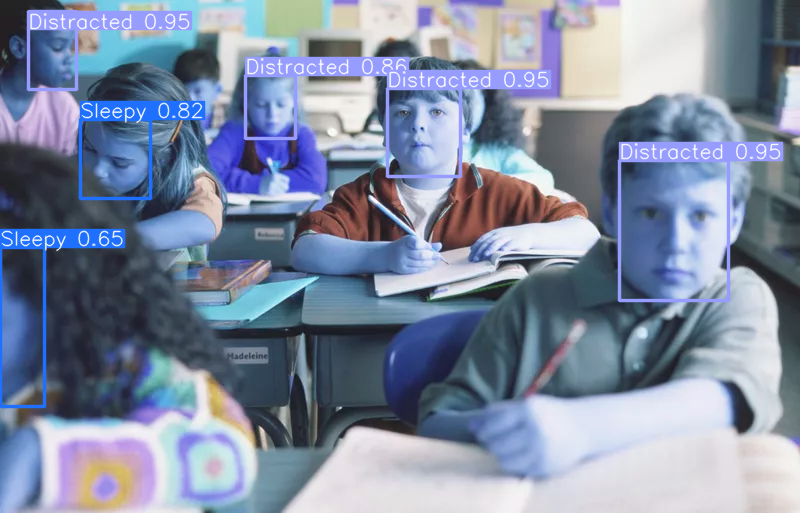

In [ ]:
img = 'https://www.verywellfamily.com/thmb/qZqLahwQp6hNeYkWu8NdI7mMz6o=/800x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/94116343-56a36fb35f9b58b7d0d1f33d.jpg' 
#img = '/content/sample_data/images.jpg' 

# Inference
results = model(img)

# Results
results.print()


import cv2
from google.colab.patches import cv2_imshow
results.display(render=True)
cv2_imshow(results.imgs[0])
